In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
dataset=pd.read_csv("D:\data.csv")

In [27]:
dataset.head(5)

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


In [28]:
df=dataset

Text(0, 0.5, 'Height')

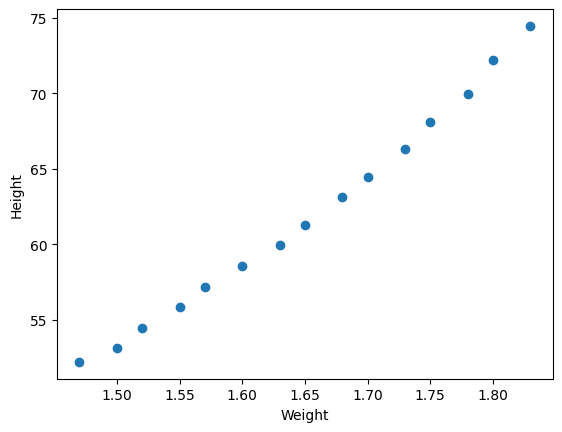

In [29]:
plt.scatter(df['Height'],df['Weight'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [30]:
## Divide dataset wrt indep and depend features
X=df[['Weight']] #indep
y=df['Height'] #depend

In [31]:
y

0     1.47
1     1.50
2     1.52
3     1.55
4     1.57
5     1.60
6     1.63
7     1.65
8     1.68
9     1.70
10    1.73
11    1.75
12    1.78
13    1.80
14    1.83
Name: Height, dtype: float64

In [32]:
X

,Weight
0,52.21
1,53.12
2,54.48
3,55.84
4,57.20
5,58.57
6,59.93
7,61.29
8,63.11
9,64.47


In [33]:
## Train Test Split
from sklearn.model_selection import train_test_split

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [35]:
X.shape

(15, 1)

In [36]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((12, 1), (12,), (3, 1), (3,))

In [37]:
## Standardize the dataset with trained independent feature(z score)
from sklearn.preprocessing import StandardScaler

In [38]:
scaler=StandardScaler()

In [ ]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

array([[ 1.47062846],
       [-0.53420527],
       [ 0.13407264],
       [-1.13624417],
       [-1.33643315],
       [ 1.80476741],
       [-0.73586622],
       [-0.13382731],
       [ 0.60068959],
       [ 1.1364895 ],
       [-0.9360552 ],
       [-0.33401629]])

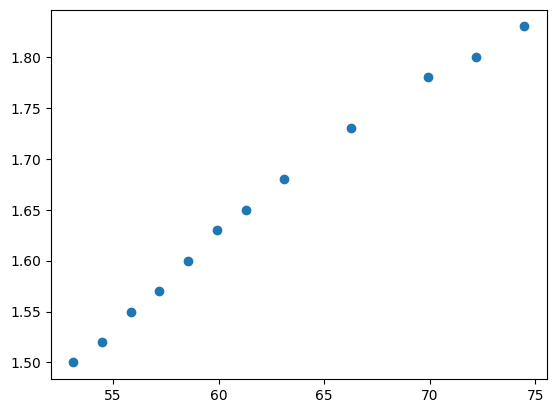

In [40]:
plt.scatter(X_train,y_train)

In [42]:
X_train

,Weight
13,72.19
5,58.57
8,63.11
2,54.48
1,53.12
14,74.46
4,57.20
7,61.29
10,66.28
12,69.92


In [43]:
y_train

13    1.80
5     1.60
8     1.68
2     1.52
1     1.50
14    1.83
4     1.57
7     1.65
10    1.73
12    1.78
3     1.55
6     1.63
Name: Height, dtype: float64

In [48]:
## Train the model using simple liner regression
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [ ]:
regression.fit(X_train,y_train)

LinearRegression()

In [52]:
print("Intercept",regression.coef_)

Intercept [0.0156927]


In [51]:
print("Slope of weight",regression.intercept_)

Slope of weight 0.6772604802107353


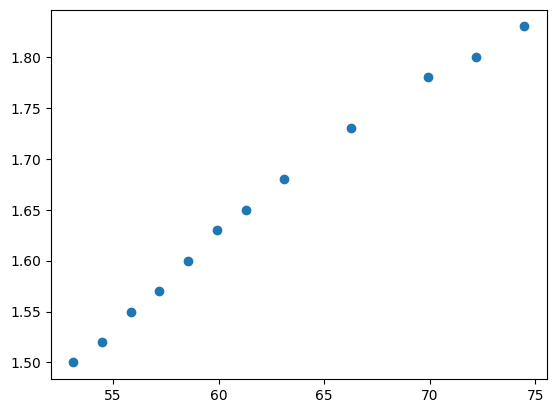

In [53]:
plt.scatter(X_train,y_train)

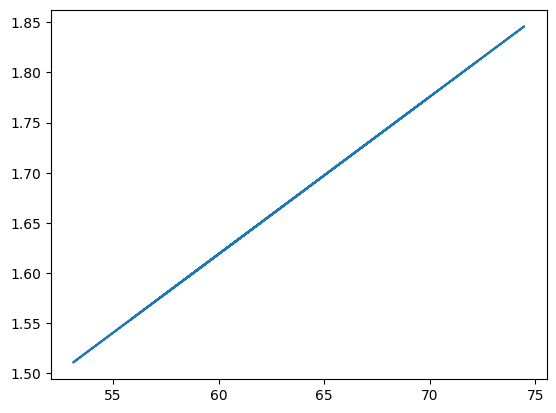

In [54]:
plt.plot(X_train,regression.predict(X_train))

In [ ]:
y_pred_test=regression.predict(X_test)

In [57]:
y_pred_test,y_test

(array([1.68896884, 1.74593334, 1.49657634]),
 9     1.70
 11    1.75
 0     1.47
 Name: Height, dtype: float64)

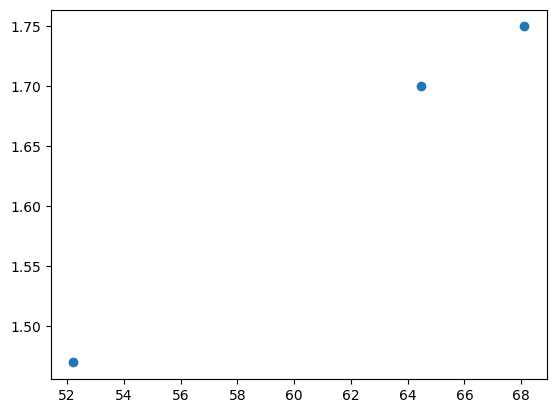

In [58]:
plt.scatter(X_test,y_test)

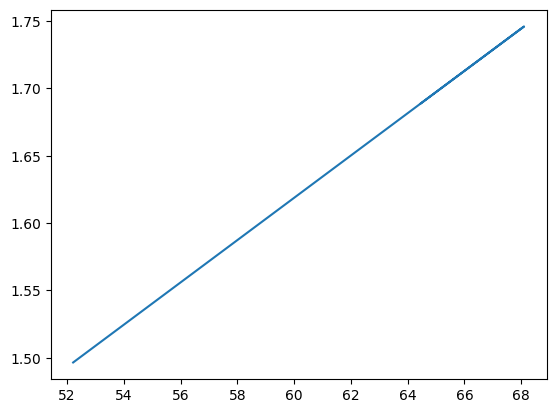

In [59]:
plt.plot(X_test,y_pred_test)

In [ ]:
### Perfomance  matrices
## MSE,MAE,RMSE
## R**2 and adjusted R**2

In [60]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,root_mean_squared_error

In [62]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=root_mean_squared_error(y_test,y_pred_test)
print(mse)
print(mae)
print(rmse)

0.000281508678552779
0.013891386742554523
0.016778220363101056


In [65]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_test)
print(score)

0.9810644386623691


In [67]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.9621288773247383

In [69]:
df.head(5)

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


In [75]:
## calculate new data point
scaled_weight=scaler.transform([[1.55]])

d:\ML\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [76]:
print(scaled_weight)

[[-8.9274225]]


In [81]:
pred_height=regression.predict([scaled_weight[0]])

d:\ML\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [82]:
print("Height prediction of weight 1.55 is ",pred_height)

Height prediction of weight 1.55 is  [0.53716512]


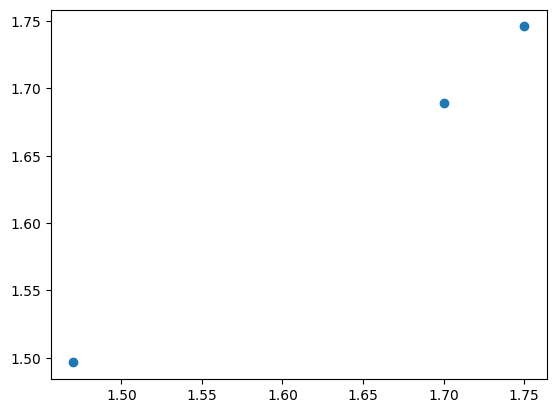

In [83]:
### Assumtions
## plot scatter plot for prediction
plt.scatter(y_test,y_pred_test)

In [84]:
## Residuals
residuals=y_test-y_pred_test

In [85]:
residuals

9     0.011031
11    0.004067
0    -0.026576
Name: Height, dtype: float64

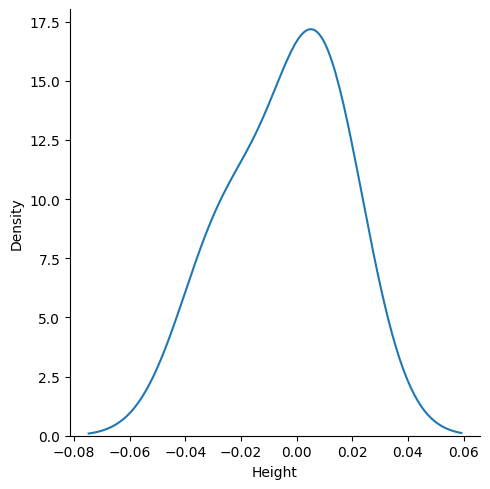

In [88]:
## plot residuals 
import seaborn as sns
sns.displot(residuals,kind='kde')